
Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)


# **Importing Libraries**

In [1]:
# Loading Dataset
import pandas as pd
import numpy as np

#EDA
from collections import Counter
import pandas_profiling as pp

# Pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Model Selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential # pre-trained model
from keras.layers import Dense

# Model Evaluation Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

# Visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To remove unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

## Using UCI Machine Learning repository

In [2]:
# First we need to install uciml repository
# pip install ucimlrepo

In [3]:
# from ucimlrepo import fetch_ucirepo : Use the following commands

# # fetch dataset
# heart_disease = fetch_ucirepo(id=45)

# # data (as pandas dataframes)
# X = heart_disease.data.features
# y = heart_disease.data.targets

In [4]:
# heart_disease.data.original

## Importing Dataset from kaggle

In [5]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.shape

(1025, 14)

# **Exploratory Data Analysis (EDA)**

In [8]:
# Only uncomment when dataset imported using uci machineml repo

# heart_disease.variables.type, heart_disease.variables.name, heart_disease.variables.description append the output of these into a single list

# list(zip(heart_disease.variables.type, heart_disease.variables.name, heart_disease.variables.description))

In [9]:
# heart_disease.variables.missing_values

## Missing Value Detection

In [10]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## Descriptive statistics

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [12]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Pre-Processing and Data splitting**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0) # 30:70 slpitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [14]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 363, 0: 354})

# **ML models**

Here we take different machine learning algorithm and try to find algorithm which predict accurately.

1. Naive Bayes
2. Support Vector Machine
3. Decision Tree
4. Random Forest Classifier

**1. Naive Bayes**

confussion matrix
[[118  27]
 [ 21 142]]


Accuracy of Naive Bayes model: 84.4155844155844 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.84      0.87      0.86       163

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



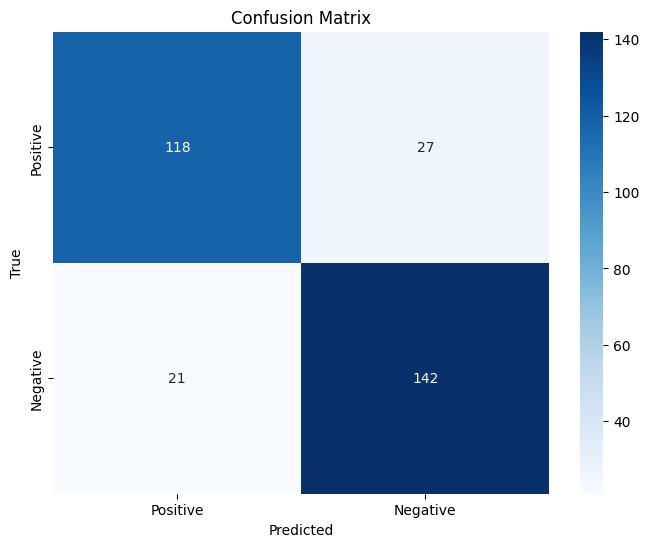

In [15]:
m1 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:", nb_acc_score*100, '\n')
print(classification_report(y_test,nbpred))

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**2. Support Vector Machines**

confussion matrix
[[112  33]
 [ 11 152]]


Accuracy of Support Vector Classifier: 85.71428571428571 

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       145
           1       0.82      0.93      0.87       163

    accuracy                           0.86       308
   macro avg       0.87      0.85      0.85       308
weighted avg       0.86      0.86      0.86       308



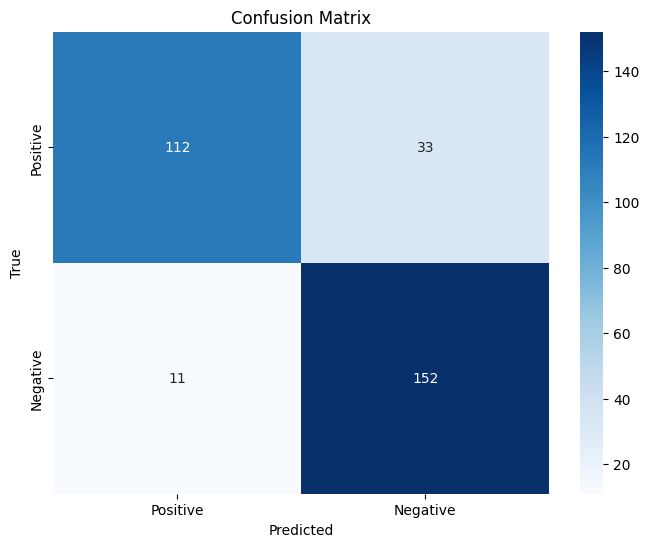

In [16]:
m2 = 'Support Vector Classifier'
svc =  SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score*100, '\n')
print(classification_report(y_test,svc_predicted))

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**3. Decision Tree**



Accuracy of DecisionTreeClassifier: 89.6103896103896 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       145
           1       0.92      0.88      0.90       163

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308



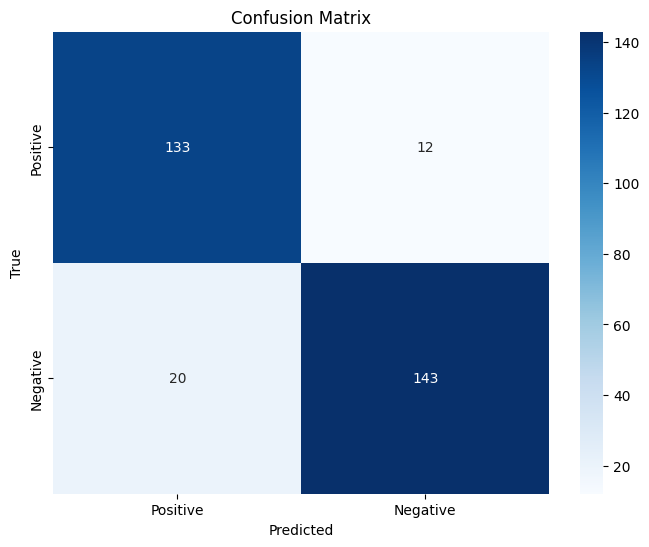

In [17]:
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 5)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("\n")
print("Accuracy of DecisionTreeClassifier:", dt_acc_score*100, '\n')
print(classification_report(y_test,dt_predicted))

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**4. Random Forest Classifier**



Accuracy of Random Forest: 93.5064935064935 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       145
           1       0.93      0.94      0.94       163

    accuracy                           0.94       308
   macro avg       0.94      0.93      0.93       308
weighted avg       0.94      0.94      0.94       308



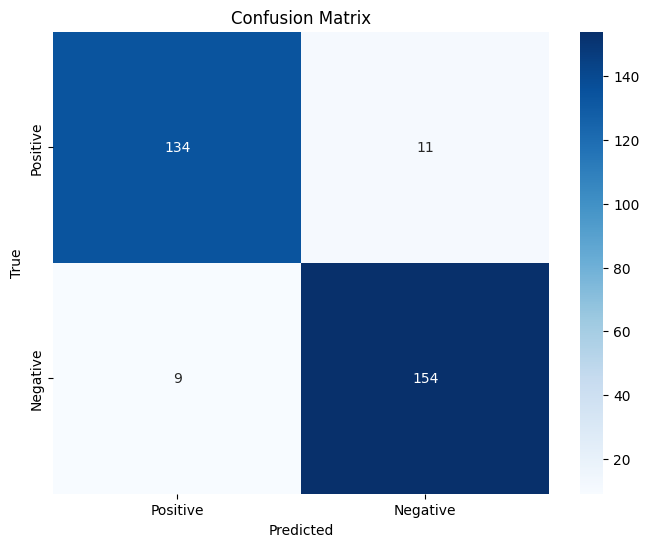

In [18]:
m4 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Out of all the models tested above, Random Forest Classifier shows the highest accuracy for this ML problem. So we predict the best peforming model is RF.** 
It shows an accuracy of 94.48%

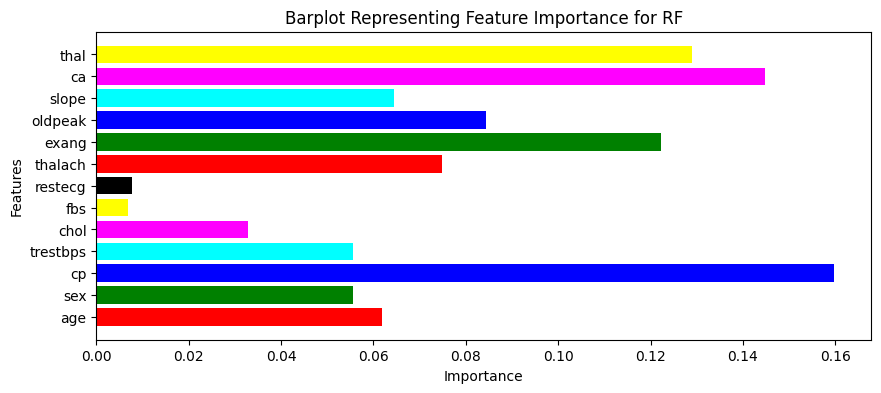

In [19]:
# Define RGB colors for each feature
feature_colors = {
    'age': 'red',
    'sex': 'green',
    'cp': 'blue',
    'trestbps': 'cyan',
    'chol': 'magenta',
    'fbs': 'yellow',
    'restecg': 'black',
    'thalach': 'red',
    'exang': 'green',
    'oldpeak': 'blue',
    'slope': 'cyan',
    'ca': 'magenta',
    'thal': 'yellow'
}
imp_feature_rf = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                          'exang', 'oldpeak', 'slope', 'ca', 'thal'],
                               'Importance': rf.feature_importances_})

# Plot the feature importances with RGB colors
plt.figure(figsize=(10, 4))
plt.title("Barplot Representing Feature Importance for RF")
plt.xlabel("Importance")
plt.ylabel("Features")

# Use the specified RGB colors for each feature
plt.barh(imp_feature_rf['Feature'], imp_feature_rf['Importance'], color=[feature_colors.get(feature, 'gray') for feature in imp_feature_rf['Feature']])
plt.show()

**The above graph shows Oldpeak(ST depression induced by exercise relative to rest) and Chest pain(cp) are major symptoms of heart attack.**

# **Artificial Neural Network(ANN)**

Alternatively, we can also try and use a simple ANN architecture to solve the same problem. The most noteworthy thing here is that previously no such work has been done that utilize ANN's to solve this problem.

**Build the ANN**

In [20]:
#Initialize the Artificial Neural Network
ann = Sequential()

In [21]:
#Add the input layer and the first hidden layer
ann.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

In [22]:
#Add the second hidden layer
ann.add(Dense(units = 7, kernel_initializer= 'uniform', activation = 'relu'))

In [23]:
#Add the output layer
ann.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

**Compile the ANN**

In [24]:
#Compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Train the ANN**

In [25]:
#Fit the ANN to the Training set
history = ann.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data=(X_test, y_test), verbose=0)

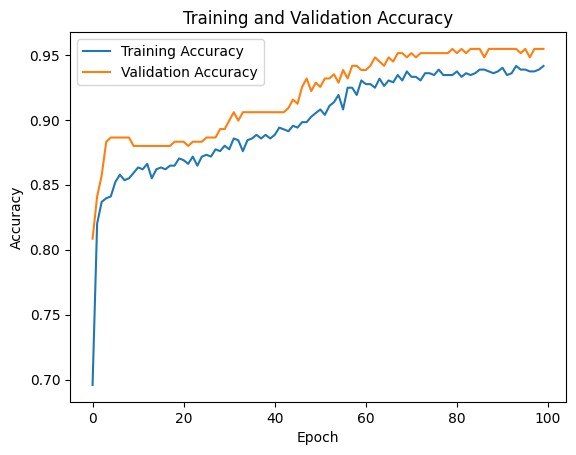

In [26]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Predict the Test Set Results**

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 1ms/step


Plotting Training and Validation Loss.

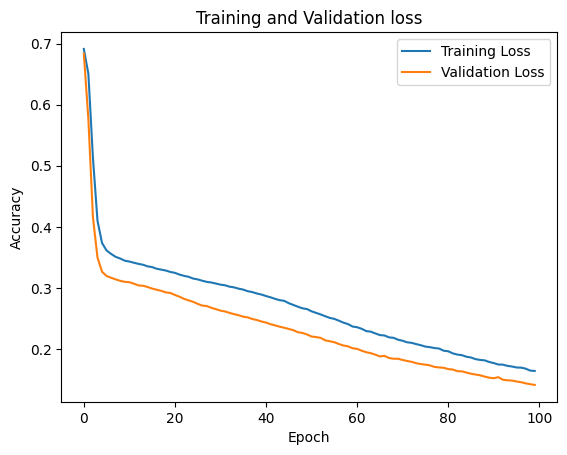

In [28]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plotting Training and Test Accuracies.

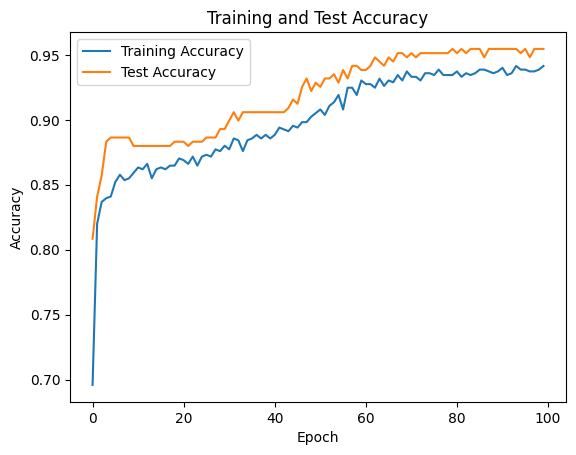

In [29]:
# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Make the Confusion Matrix**



Accuracy of Artificial Neural Network: 95.45454545454545 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       145
           1       0.97      0.94      0.96       163

    accuracy                           0.95       308
   macro avg       0.95      0.96      0.95       308
weighted avg       0.95      0.95      0.95       308



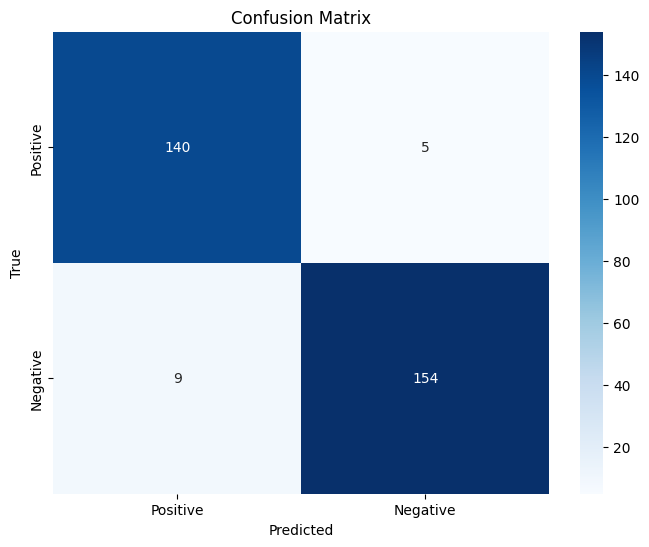

In [30]:
ann_conf_matrix = confusion_matrix(y_test, y_pred)
ann_acc_score = accuracy_score(y_test,y_pred)
print("\n")
print("Accuracy of Artificial Neural Network:",ann_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(ann_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Model Evaluation**

In [31]:
model_ev = pd.DataFrame({'Model': ['Naive Bayes','Support Vector Machine','Decision Tree','Random Forest', 'Artificial Neural Network'], 
                         'Accuracy': [nb_acc_score*100,svc_acc_score*100,dt_acc_score*100,rf_acc_score*100,ann_acc_score*100]})
model_ev

,Model,Accuracy
0,Naive Bayes,84.415584
1,Support Vector Machine,85.714286
2,Decision Tree,89.610390
3,Random Forest,93.506494
4,Artificial Neural Network,95.454545


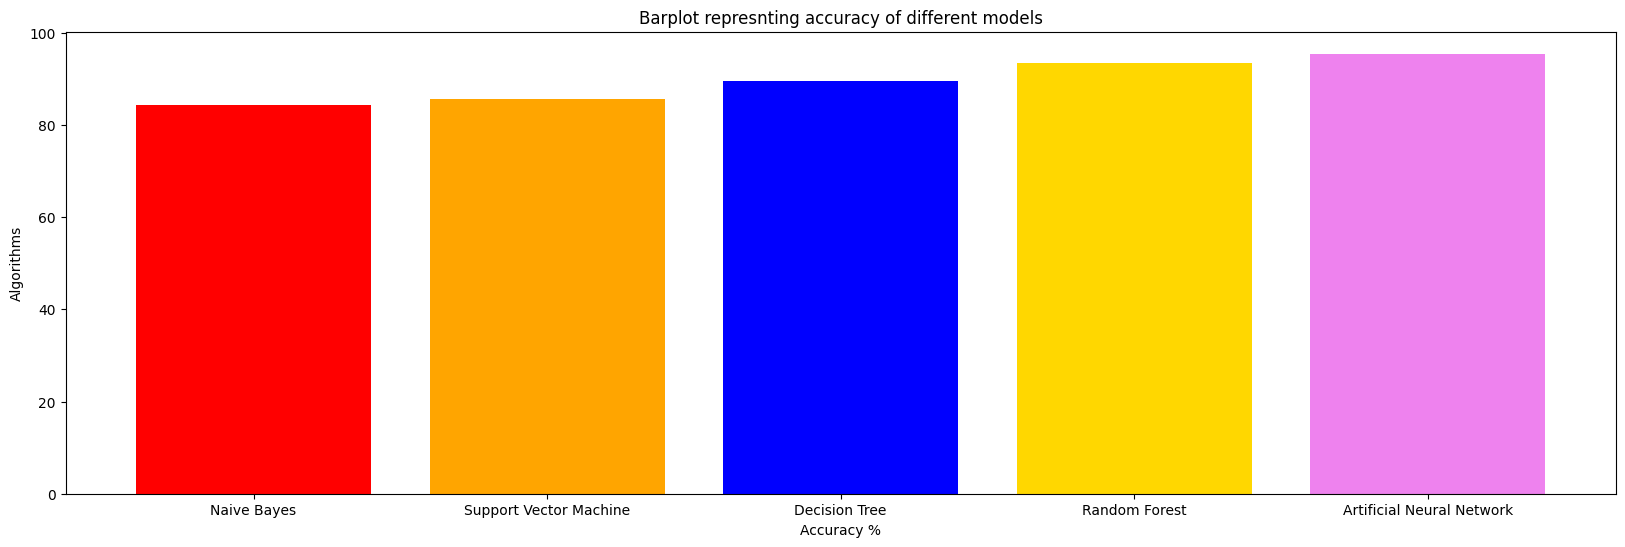

In [32]:
colors = ['red','orange','blue','gold', 'violet']
plt.figure(figsize=(20,6))
plt.title("Barplot represnting accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## **ROC Curve**
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds

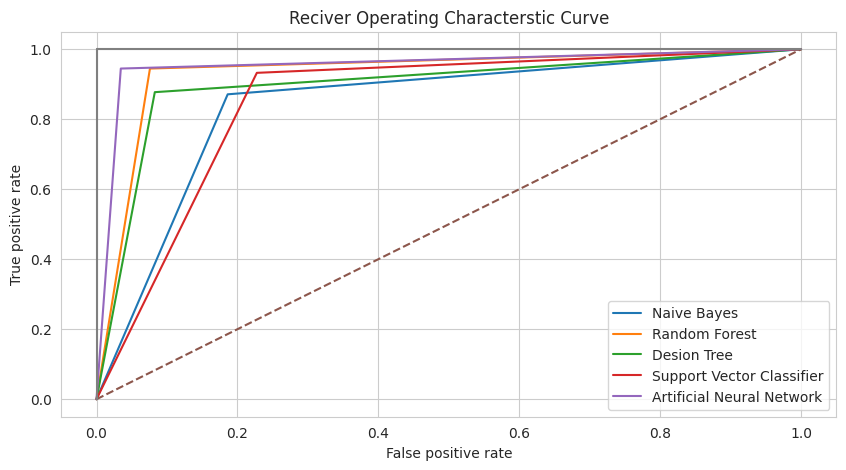

In [33]:
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
ann_false_positive_rate,ann_true_positive_rate,ann_threshold = roc_curve(y_test,y_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(ann_false_positive_rate,ann_true_positive_rate,label='Artificial Neural Network')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Conclusion**

1) Artificial Neural Network(ANN) gives the best accuracy compared to other models.

2) Oldpeak(ST depression induced by exercise relative to rest) and Chest pain(cp) are major symptoms of heart attack.